In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
%matplotlib inline

In [2]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.shape

(10000, 14)

In [5]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:>

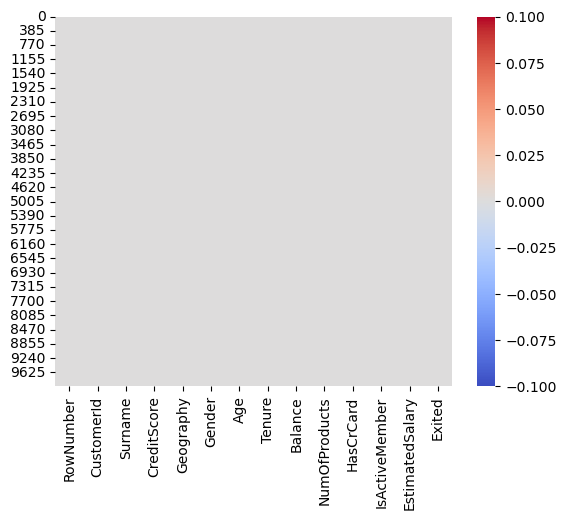

In [6]:
sns.heatmap(data.isna(), annot=False, cmap='coolwarm')

In [7]:
# divide the dataset in dependent and independent
X = data.iloc[:,3:13]
Y = data.iloc[:,13]

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [10]:
# Feature engineering
geography = pd.get_dummies(X['Geography'], drop_first=True, dtype=int)
gender = pd.get_dummies(X['Gender'], drop_first=True, dtype=int)

In [11]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [12]:
# concanteate then
X.drop(['Geography','Gender'], axis=1, inplace=True)

In [13]:
X=pd.concat([X,geography,gender], axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [14]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [15]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\ProgramData\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [16]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [17]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [18]:
X_train.shape

(8000, 11)

In [20]:
# create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [21]:
# lets initialize the ANN
classifier = Sequential()

In [22]:
# Adding the input layer
classifier.add(Dense(11, activation='relu'))
classifier.add(Dense(7, activation='relu'))
classifier.add(Dense(6, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

In [24]:
import tensorflow
opt = tensorflow.optimizers.Adam(learning_rate=0.01)

In [29]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics='accuracy')

In [33]:
# early stopping:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)

In [34]:
model_history = classifier.fit(X_train, Y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3365 - accuracy: 0.8623 - val_loss: 0.3553 - val_accuracy: 0.8497
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3351 - accuracy: 0.8602 - val_loss: 0.3651 - val_accuracy: 0.8455
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3365 - accuracy: 0.8623 - val_loss: 0.3594 - val_accuracy: 0.8504
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3333 - accuracy: 0.8632 - val_loss: 0.3639 - val_accuracy: 0.8565
Epoch 5/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3338 - accuracy: 0.8615 - val_loss: 0.3573 - val_accuracy: 0.8501
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3314 - accuracy: 0.8651 - val_loss: 0.3590 - val_accuracy: 0.8440
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3317 - accuracy: 0.8634 - val_loss: 0.3609 - val_accuracy:

In [35]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

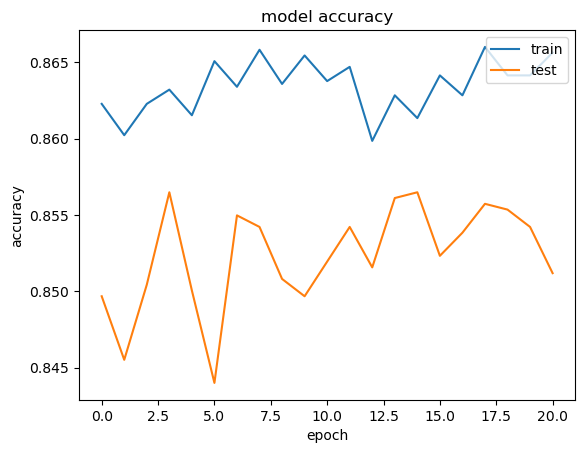

In [38]:
# summarize the history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc=1)

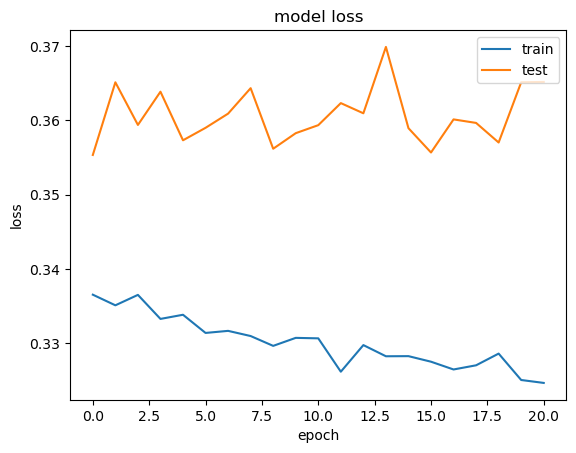

In [39]:
# for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc=1)

In [40]:
# Making the prediction and evaluating the model

y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

63/63 [==============================] - 0s 3ms/step


In [41]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [42]:
cm

array([[1536,   59],
       [ 221,  184]], dtype=int64)

In [43]:
#calculate the accuracy:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, Y_test)
score

0.86

In [44]:
# get the weights:
classifier.get_weights()

[array([[-0.16731648,  0.33958268,  0.16583124, -0.22069322, -0.12685053,
         -0.00841859,  0.00389403, -0.7358859 , -0.15291807,  0.01181098,
          0.30945978],
        [ 2.8049355 , -3.2003424 , -1.2189748 , -1.9098829 ,  0.18184988,
          0.24916281,  2.6549163 , -0.5101547 ,  0.28816506,  0.9783981 ,
         -0.405434  ],
        [-0.8291956 , -0.748377  ,  0.1832535 ,  0.15048148,  0.03919324,
          0.35464925, -0.37992674,  1.397924  , -1.2045304 ,  0.03279679,
          0.77183306],
        [-0.53873986, -0.48851705, -1.6185086 ,  0.8582869 , -3.0389338 ,
         -1.5564111 , -0.07564659,  0.9596136 ,  2.126387  ,  0.8703137 ,
         -1.8511096 ],
        [-2.005027  ,  0.40804502,  0.28713188,  0.07276932, -3.2659986 ,
          2.7453842 ,  0.19546658,  0.22575378, -0.56773895,  3.0105677 ,
         -1.1644626 ],
        [-0.5928361 , -0.2112793 ,  0.42794266, -0.18715179,  0.02552335,
         -0.08378968, -0.05950288,  0.10658047,  0.34486458, -0.0513164